# OOPS CONCEPTS IN PYTHON 

#### creating class with constructor is simple with little difference <mark> <bold> SELF </bold> <mark/>
    

#### to access member fields and methods you have to use  <mark> SELF <mark> 
#### using it is not optional like in other languages

In [41]:
class Point:
    def __init__(self,x=0,y=0):#method overloading is generally achieved by default paramters although(you can make function)
        self.x=x
        self.y=y
    def __str__(self):
        return "("+ str(self.x)+","+str(self.y)+")"

In [60]:
p1=Point(0,0)   #p1 is reference variable same as "Pointer in python try printing it without __str__ defined"
p2=Point(4,0)   #notice we dont pass self here is passed automatically
p3=Point(0,3)

x=str(p1)
print("1 :",p1," P2 :",p2)

1 : (0,0)  P2 : (4,0)


# Composition
### Composition is simple as always

In [61]:
class Shape:
    
    def __init__(self,points):
        self.points=points
        
    def __str__(self):
        s=""
        for  point in self.points:
            s+= str(point)+"\n"
        return s
    
#     def __init__(self):   
#         pass            #pass is keyword that defines that you are not defining body not so it dont gives error

In [62]:
points=[p1,p2,p3]
s=Shape(points)
print(s)

(0,0)
(4,0)
(0,3)



# <bold>Inheritance<bold>
#### Syntax for inheritance is slightly different but quite easy and concepts translates exactly
#### you can achieved multiple inhteritance but it is not generally recommended as it creates ambuiguity 
#### so dont use multiple inheritance there are very few exceptions

In [63]:
class Triangle(Shape): #Triangle inherits from shape class you can give more class names with comma for multiple inhertoance
    pass               #pass means i will not have any code in this block

In [64]:
t= Triangle(points) #we dont define triangle class so how its object is created ? yes inheritance
print(t)            #also __str__ from shape

(0,0)
(4,0)
(0,3)



#### you can also add functions to class even after class is defined at runtime
#### and good thing this function is also available in objects created before function defination

In [65]:
def get_area(self):
        p1, p2, p3 = self.points
        return 0.5 * abs(p1.x * (p2.y - p3.y) + p2.x * (p3.y - p1.y) + p3.x * (p1.y - p2.y))
Triangle.get_area=get_area  #Triangle class will have func name get_area whoes body is same as get_area
                            #names of function can differ but convention is to go with same name 

In [67]:
t.get_area()   #see t was defined before decalaration of get_area but get function at runtime

6.0

# ACCESSING PARENT CLASS AND OVERRIDING METHOD

In [84]:
class Rectangle:
    
    
    def __init__(self,length,width):
        self.length=length
        self.width=width
        
    
    def get_area(self):
        return self.length * self.width
    
    
    def perimeter(self):
        return 2 * self.length + 2 * self.width
    
    
    def __str__(self):
        return "L : "+str(self.length)+" W : "+str(self.width)

In [85]:
class Square(Rectangle):
    
    
    def __init__(self,l):
        super().__init__(l,l)
    
    def __str__(self):
        return "Square  "+super().__str__()

In [83]:
s=Square(2)
print(s.get_area())
print(s)

4
Square  L : 2 W : 2


# POLYMORPHISM
#### as there is no data type in python you get polymorphism for free bcz of no concept of parent and child object

# ACCESS MODIFIER
####  There are none. By convention the dunder function(starts and  end with double underscore __) are private.
####  If you still want to access it from outside the response is good luck !
#### Note : Acces modifier is for abstraction not for security so dont mix them you still achieve abstraction and encapsulation

# Order Of Growth 
#### Recall Fibonacci series
#### 1,2,3,5,8.....so on
#### fib(n) = fib(n-1) + fib(n-2)  
#### we have two alternative for computing fibonacci iterative and recursive

In [88]:
#as you will see later this method is slow
# try thinking how to make this recursive solution more optimize so it become as good as iterative one
# hint try researching about memoization and tabulation
def fib1(n):
    if n<=1:
        return 1
    return fib(n-1) + fib(n-2)   

In [93]:
#iterative solution
def fib2(n):
    a=1
    b=1
    
    for i in range(n):
        a,b=b,a+b
        
    return a
        

In [98]:
print("Fib 1 :  ",end="")
for i in range(15):
    print(fib1(i),end=",")
print("")
print("Fib 2 :  ",end="")
for i in range(15):
    print(fib2(i),end=",")    

Fib 1 :  1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,
Fib 2 :  1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,

In [103]:
import time
def calculate_runing_time(f,n):    
    l=[]
    
    for i in range(n):
        
        start_time=int(round(time.time()*1000))  #getting current time in sec
        
        f(i)
        
        end_time=int(round(time.time()*1000))
        total_taken=end_time-start_time   #total time for execution is end - start time of execution of function
        
        l.append(total_taken)
        
    return l

In [104]:
import matplotlib.pyplot as plt

In [108]:
limit=35
fib_1_times=calculate_runing_time(fib1,limit)
fib_2_times=calculate_runing_time(fib2,limit)
print(fib_1_times,fib_2_times)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 3, 5, 13, 14, 20, 48, 68, 90, 111, 120, 202, 311, 528, 833, 1599, 3744] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


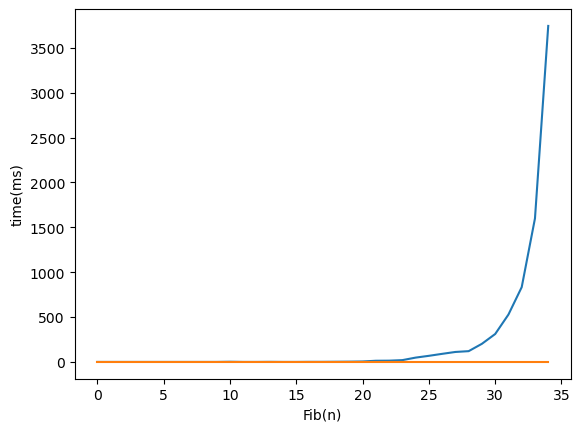

In [110]:
plt.xlabel("Fib(n)")
plt.ylabel("time(ms)")
plt.plot(fib_1_times)
plt.plot(fib_2_times)
plt.show()